project for 207

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  

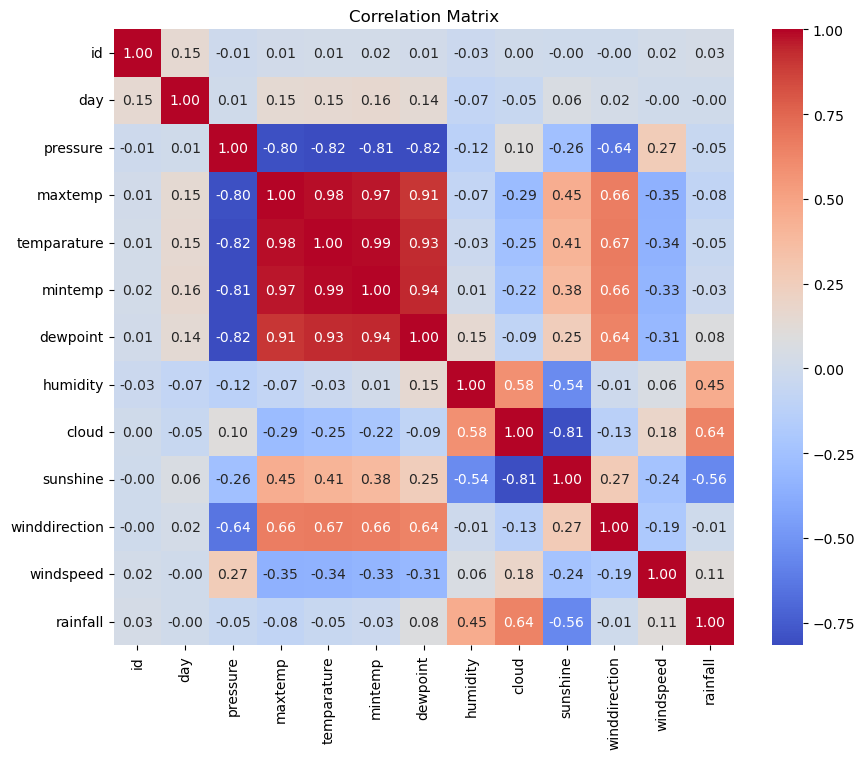


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.61      0.70       119
           1       0.87      0.94      0.90       319

    accuracy                           0.85       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.85      0.85      0.85       438

Accuracy: 0.8538812785388128


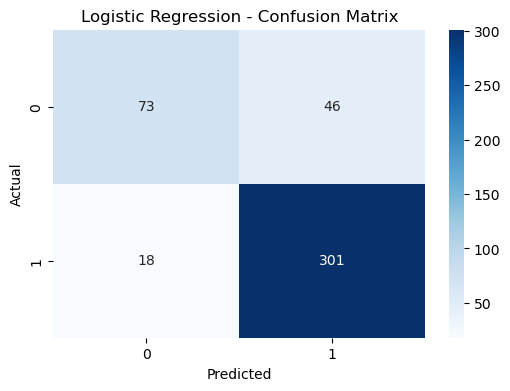


Gradient Boosting Classifier Performance:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       119
           1       0.87      0.95      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438

Accuracy: 0.8561643835616438


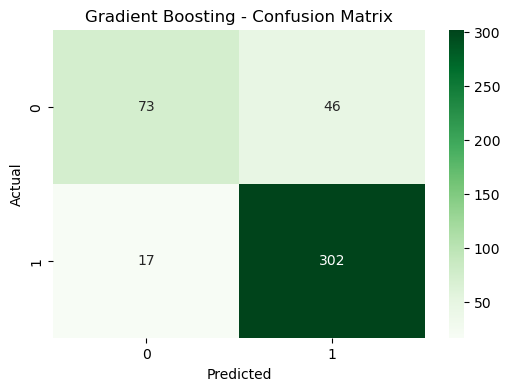

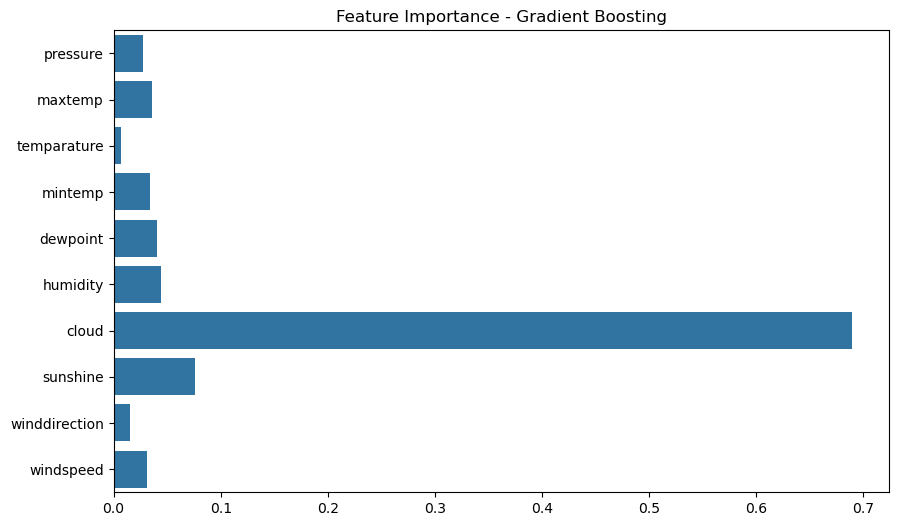

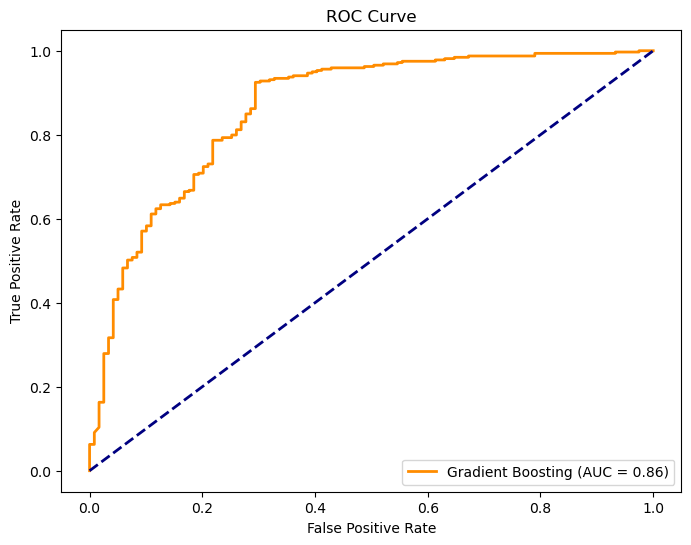

Predictions saved to rainfall_predictions.csv


In [1]:
# Rainfall Prediction using Logistic Regression and Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load datasets
train_df = pd.read_csv('./data/rainfall/train.csv')
test_df = pd.read_csv('./data/rainfall/test.csv')

# Display basic information
print("Train Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

# Display first few rows
print(train_df.head())
print(test_df.head())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

# Fill missing values with median
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Ensure consistent columns
features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

X = train_df[features]
y = train_df['rainfall']

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df[features])

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Baseline Model: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_val_scaled)

print("\nLogistic Regression Performance:")
print(classification_report(y_val, y_pred_log))
print("Accuracy:", accuracy_score(y_val, y_pred_log))

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Improved Model: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_val_scaled)

print("\nGradient Boosting Classifier Performance:")
print(classification_report(y_val, y_pred_gb))
print("Accuracy:", accuracy_score(y_val, y_pred_gb))

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_gb), annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_model.feature_importances_, y=features)
plt.title('Feature Importance - Gradient Boosting')
plt.show()

# ROC Curve for Gradient Boosting
fpr, tpr, _ = roc_curve(y_val, gb_model.predict_proba(X_val_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Predict on the test set
gb_test_predictions = gb_model.predict(test_scaled)

# Save predictions
submission = pd.DataFrame({'id': test_df['id'], 'rainfall': gb_test_predictions})
submission.to_csv('rainfall_predictions.csv', index=False)

print("Predictions saved to rainfall_predictions.csv")
